[-2 -1  0  1  2]
[0 1 2 3 4]


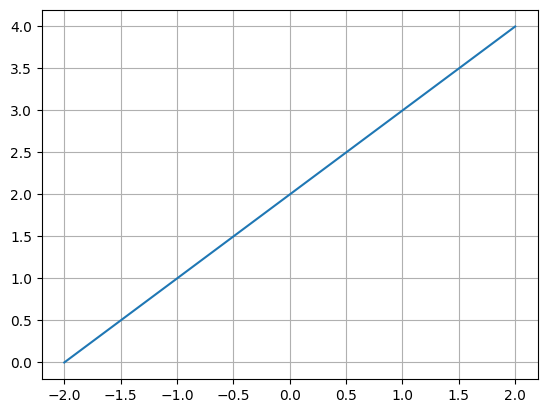

In [ ]:
#Practica 2 bioseñales Manuela, Omar y Felipe

import numpy as np
import matplotlib.pyplot as plt

def impseq(n0,n1,n2):
  n=np.arange(n1,n2+1)
  x=n-n0==0
  return [x,n]

def esacalon_unitario(n0,n1,n2):
  n=np.arange(n1,n2+1)
  x = (n >= n0).astype(int)
  #x = (n - n0) >= 0
  #u = np.where(n >= n0, 1, 0)# Asigna 1 a los valores donde n >= n0, y 0 en caso contrario

  return n,x

n0 =-2  # Punto donde ocurre el escalón
n1 = -2  # Inicio del intervalo
n2 = 2  # Fin del intervalo
#n, x = esacalon_unitario(n1, n0, n2)

def rampa(n0,n1,n2):
  n=np.arange(n1,n2+1)
  x=np.where(n >= n0,n-n0,0)
  print(n)
  print(x)
  return n,x

n, x = rampa(n1, n0, n2)
# Graficar
plt.plot(n, x)
plt.grid()
plt.show()



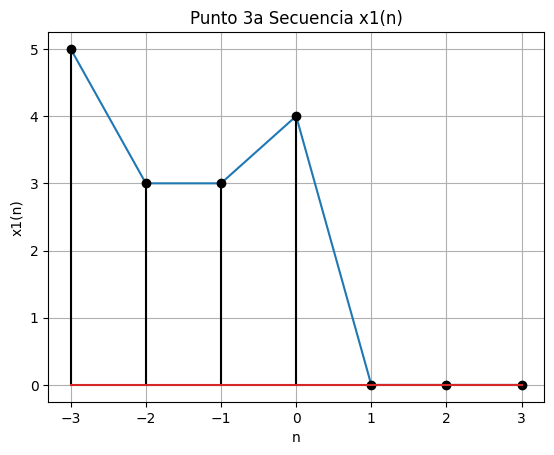

In [ ]:
#Punto 3

#Literal a).

def impseq(n0, n1, n2):
    n = np.arange(n1, n2+1)  # Vector de muestras
    x = (n-n0) == 0
    return n, x

# Definir rango de muestras
n1, n2 = -3, 3  # Extender un poco para ver la secuencia completa
n = np.arange(n1, n2+1)

#El vector de muestra deben ser los lugares donde hay impulsos, y otros valores donde para corroborar que no hayan impulsos
Vector_muestra=[-3,-2,-1,0,1,2,3]

# Construir la señal x1(n)
x1 = (3 * (n == -1)) + (5 * (n == -3)) + (3 * (n == -2)) + (3 * (n == 0)) + (n == 0)

# Graficar la secuencia
plt.plot(n, x1)
plt.stem(n,x1, "k")
plt.xlabel('n')
plt.ylabel('x1(n)')
plt.title('Punto 3a Secuencia x1(n)')
plt.grid(True)
plt.show()

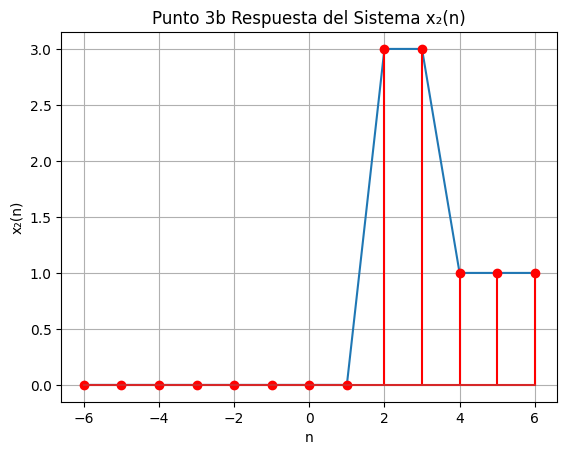

In [ ]:
#Literal b).

#del analisis del diagrama el primer termino se multiplica por -2 y se desplaza 4 unidades a la derecha "-2u(t-4)"
#para el segundo termino se multiplica por 3 y se desplaza 2 unidades a la derecha "3u(t-2)"
#Entonces X2(n)= -2u(t-4) + 3u(t-2)

def escalon(n):
    return np.where(n >= 0, 1, 0)

# El rango de -6 <= n <= 6
n = np.arange(-6, 7)

# Señales individuales
x1 = -2 * escalon(n - 4)  # -2u(t-4)
x2 = 3 * escalon(n - 2)   # 3u(t-2)

# Señal de salida x₂(n)
x2_n = x1 + x2

# Graficar
plt.plot(n, x2_n)
plt.stem(n, x2_n, "r")
plt.xlabel("n")
plt.ylabel("x₂(n)")
plt.title("Punto 3b Respuesta del Sistema x₂(n)")
plt.grid()
plt.show()

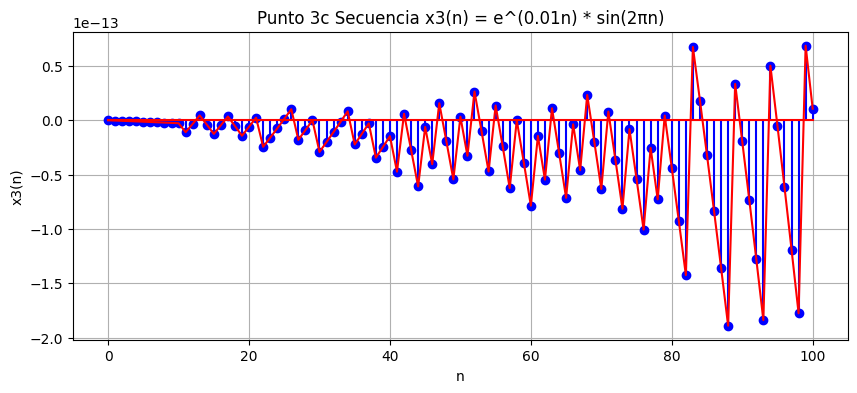

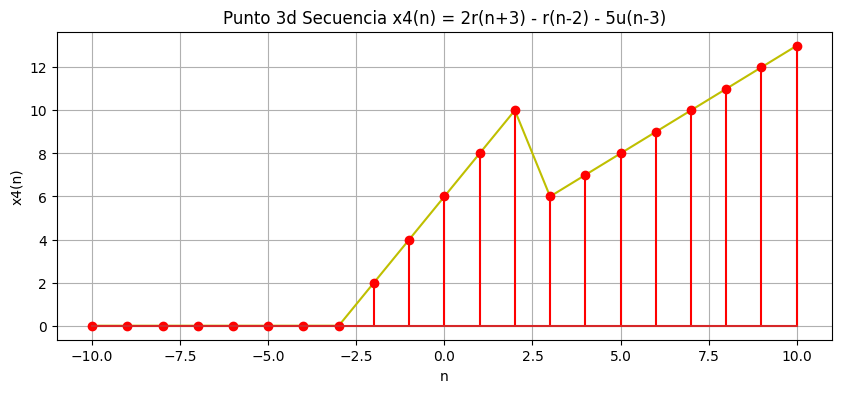

In [ ]:
# Punto c: x3(n) = e^(0.01n) * sin(2πn), con 0 ≤ n ≤ 100
n_c = np.arange(0, 101)  # Definimos el rango de n
x3_n = np.exp(0.01 * n_c) * np.sin(2 * np.pi * n_c)  # Aplicamos la ecuación

# Graficamos x3(n)
plt.figure(figsize=(10,4))
plt.stem(n_c, x3_n, linefmt='b-', markerfmt='bo', basefmt="r-")
plt.plot(n_c,x3_n, "r")
plt.xlabel("n")
plt.ylabel("x3(n)")
plt.title("Punto 3c Secuencia x3(n) = e^(0.01n) * sin(2πn)")
plt.grid()
plt.show()

# Definimos la función escalón unitario u(n)
def escalon(n):
    return np.where(n >= 0, 1, 0)

# Definimos la función rampa r(n) = n * u(n)
def rampa(n):
    return n * escalon(n)

# Punto d: x4(n) = 2r(n+3) - r(n-2) - 5u(n-3), con -10 ≤ n ≤ 10
n_d = np.arange(-10, 11)  # Rango de n
x4_n = 2*rampa(n_d + 3) - rampa(n_d - 2) - 5*escalon(n_d - 3)  # Aplicamos la ecuación

# Graficamos x4(n)
plt.figure(figsize=(10,4))
plt.plot(n_d, x4_n,"y-")
plt.stem(n_d, x4_n,"r-")
plt.xlabel("n")
plt.ylabel("x4(n)")
plt.title("Punto 3d Secuencia x4(n) = 2r(n+3) - r(n-2) - 5u(n-3)")
plt.grid()
plt.show()


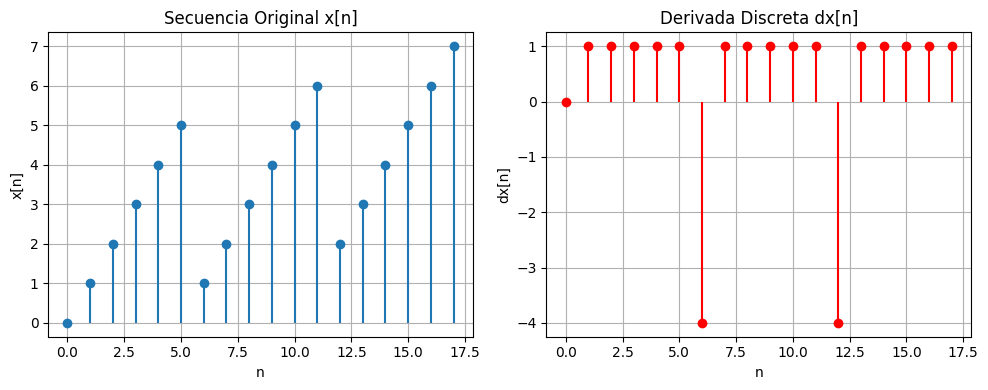

In [ ]:
# PUNTO 4
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función r[n] = n para n >= 0, que es la rampa discreta
def rampa(n):
    return np.where(n >= 0, n, 0)  # valores negativos se hacen cero

# Dominio completo de la secuencia x[n] desde 0 hasta 17
n = np.arange(0, 18)

# Inicializamos x[n] con ceros
x = np.zeros_like(n, dtype=float)

# Construimos la secuencia por tramos
x[(n >= 0) & (n <= 5)] = rampa(n[(n >= 0) & (n <= 5)])
x[(n >= 6) & (n <= 11)] = rampa(n[(n >= 6) & (n <= 11)] - 5)
x[(n >= 12) & (n <= 17)] = rampa(n[(n >= 12) & (n <= 17)] - 10)

# Derivada discreta (diferencia hacia adelante): x[n+1] - x[n]
dx = np.diff(x, prepend=0)  # prepend=0 para mantener mismo tamaño

# Graficamos ambas secuencias
plt.figure(figsize=(10, 4))

# Subplot 1: secuencia original
plt.subplot(1, 2, 1)
plt.stem(n, x, basefmt=" ")
plt.title('Secuencia Original x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid(True)

# Subplot 2: derivada discreta
plt.subplot(1, 2, 2)
plt.stem(n, dx, basefmt=" ", linefmt='r', markerfmt='ro')
plt.title('Derivada Discreta dx[n]')
plt.xlabel('n')
plt.ylabel("dx[n]")
plt.grid(True)

plt.tight_layout()
plt.show()



La secuencia x[n] es una rampa discreta por tramos que se reinicia cada seis muestras. Su derivada discreta muestra pendientes constantes dentro de cada tramo, pero presenta picos negativos en los puntos donde la rampa reinicia, debido a los saltos abruptos. Esto ocurre porque, a diferencia del caso continuo donde la derivada de una rampa suave es constante, la derivada discreta responde a cambios repentinos con variaciones bruscas, lo que explica por qué no es exactamente igual a la derivada del caso continuo.

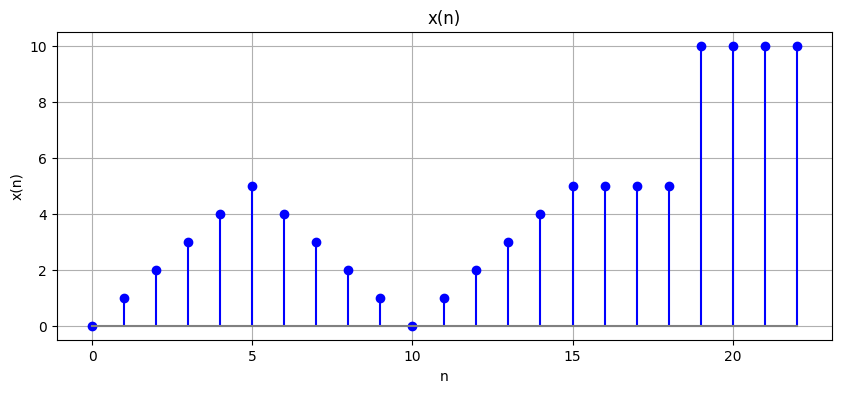

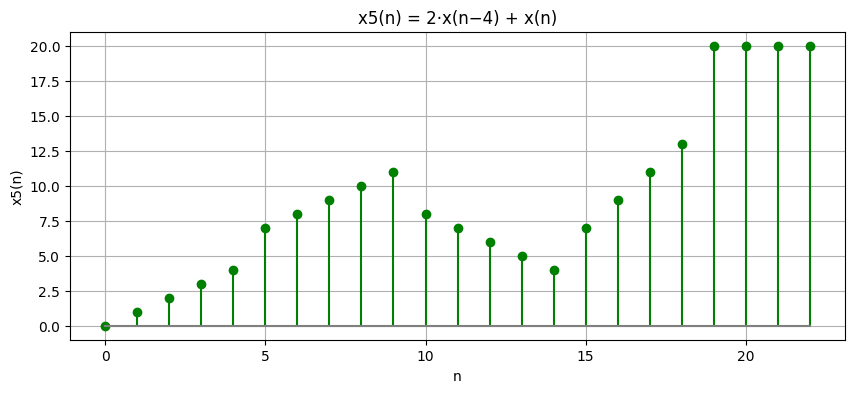

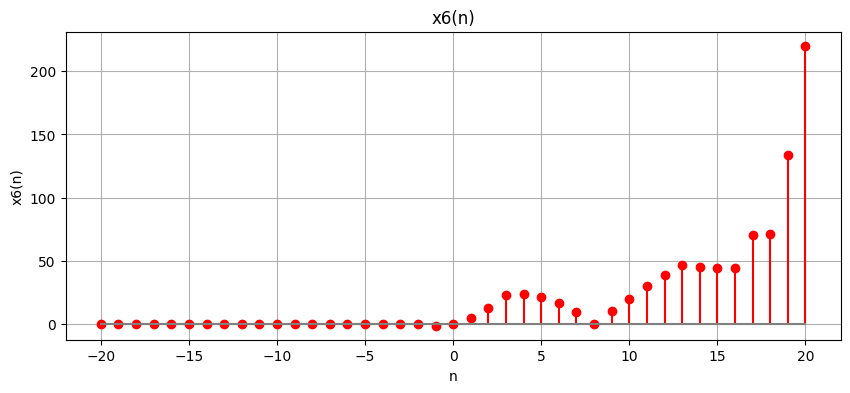

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para desplazar señales
def desplazar(x, k):
    x_shifted = np.roll(x, k)
    if k > 0:
        x_shifted[:k] = 0
    elif k < 0:
        x_shifted[k:] = 0
    return x_shifted

# Función para generar la secuencia x(n)
def generar_secuencia():
    x1 = np.array([0,1,2,3,4,5,4,3,2,1,0])
    x2 = np.array([1,2,3,4,5])
    x3 = np.array([5,5,5,10,10,10,10])
    return np.concatenate((x1, x2, x3))

# Función para graficar secuencias
def graficar_secuencia(n, x, titulo, color='b'):
    plt.figure(figsize=(10, 4))
    plt.stem(n, x, linefmt=f'{color}-', markerfmt=f'{color}o', basefmt='gray')
    plt.title(titulo)
    plt.xlabel('n')
    plt.ylabel(titulo.split(' ')[0])
    plt.grid(True)
    plt.show()

# 1. Generar x(n)
x = generar_secuencia()
n = np.arange(len(x))
graficar_secuencia(n, x, 'x(n)', 'b')

# 2. Calcular x5(n) = 2·x(n−4) + x(n)
x5 = 2 * desplazar(x, 4) + x
graficar_secuencia(n, x5, 'x5(n) = 2·x(n−4) + x(n)', 'g')

# 3. Calcular x6(n)
n_extended = np.arange(-20, 21)
x_extended = np.zeros_like(n_extended, dtype=float)

# Insertar x(n) centrado en x_extended
center = len(n_extended) // 2
insert_start = center
insert_end = min(center + len(x), len(n_extended))
x_extended[insert_start:insert_end] = x[:insert_end - insert_start]

x_n2 = desplazar(x_extended, -2)

x6 = 0.001 * np.exp(0.5 * n_extended) * x_extended + \
     10 * np.sin(0.05 * np.pi * n_extended) * x_n2

graficar_secuencia(n_extended, x6, 'x6(n)', 'r')

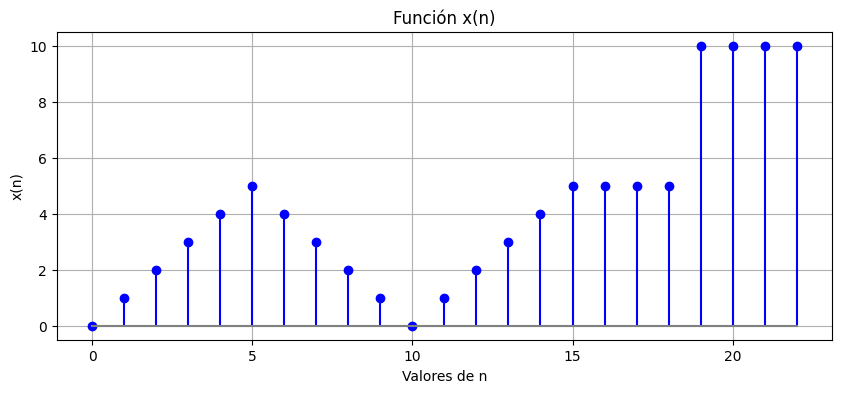

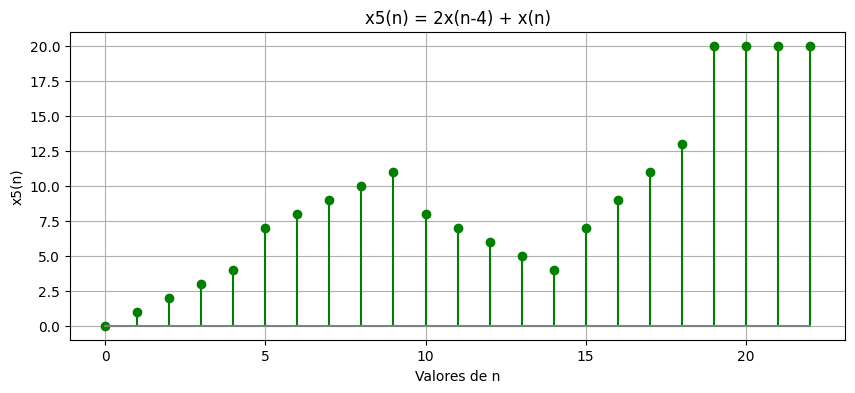

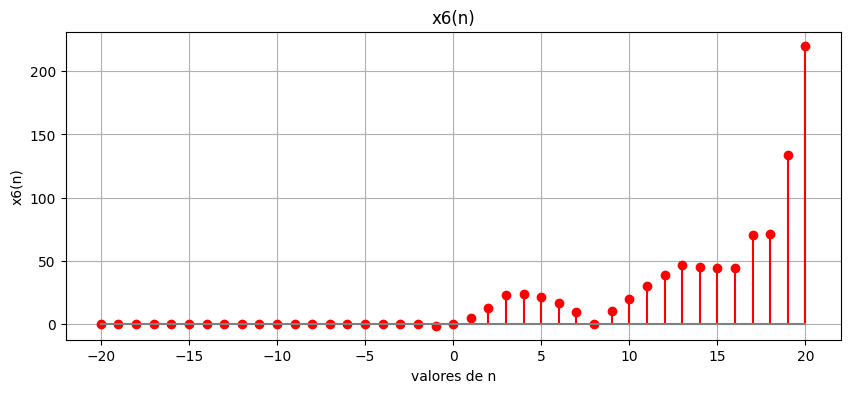

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3,4,5,4,3,2,1,0])
x2 = np.array([1,2,3,4,5])
x3 = np.array([5,5,5,10,10,10,10])
x = np.concatenate((x1, x2, x3))

n = np.arange(len(x))

#Graficar señal base xn

plt.figure(figsize=(10, 4))
plt.stem(n, x, linefmt='b-', markerfmt='bo', basefmt='gray')
plt.title('Función x(n)')
plt.xlabel('Valores de n')
plt.ylabel('x(n)')
plt.grid(True)
plt.show()

x_desplazada = np.roll(x, 4)
x_desplazada[:4] = 0  # ceros al inicio por el desplazamiento
x5 = 2 * x_desplazada + x

#graficar x5 literal a)

plt.figure(figsize=(10, 4))
plt.stem(n, x5, linefmt='g-', markerfmt='go', basefmt='gray')
plt.title('x5(n) = 2x(n-4) + x(n)')
plt.xlabel('Valores de n')
plt.ylabel('x5(n)')
plt.grid(True)
plt.show()


n_extendida = np.arange(-20, 21)
x_extendida= np.zeros_like(n_extended, dtype=float)

# x(n) en la parte central
centrar = len(n_extendida) // 2
inicio = centrar
final = min(centrar + len(x), len(n_extendida))
x_extendida[inicio:final] = x[:final - inicio]

# x(n+2) desplazamiento a la izquierda
x_desplaz = np.roll(x_extendida, -2)
x_desplaz[-2:] = 0  # ceros al final

x6 = 0.001 * np.exp(0.5 * n_extended) * x_extended + \
     10 * np.sin(0.05 * np.pi * n_extended) * x_shifted_m2

# Graficar x6 literal b)
plt.figure(figsize=(10, 4))
plt.stem(n_extended, x6, linefmt='r-', markerfmt='ro', basefmt='gray')
plt.title('x6(n)')
plt.xlabel('valores de n')
plt.ylabel('x6(n)')
plt.grid(True)
plt.show()
